## Basemap

Create a scatter overlapped on a map of the US. For every year create a different image. Use the basemap tutorial in the Python datascience handbook. Find a database with the US states names and coordinates (latitude and longitude) and find a different data base with each state population for several years. Extract the data from every database and create a dataframe from which the data for basemap will be extracted.

The data base with the states coordinates can be found here.

https://developers.google.com/public-data/docs/canonical/states_csv

The data base with anual population for the 2010 decade is here.

https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Simulation parameters. Change as needed before execution
# These parameters are coordinates to point to the center of the map and its extension
LAT_0 = 39.36827914916014
LON_0 = -98.43750000000001
CANVAS_HEIGHT = 9
CANVAS_WIDTH = 12
MAP_HEIGHT_IN_METERS = 3E6
MAP_WIDTH_IN_METERS = 6E6
BLUEMARBLE_SCALE = 0.5
ETOPO_SCALE = 0.5
ETOPO_ALPHA = 0.5
POINTS_SCALE_FACTOR = 1/2500
SCATTER_ALPHA = 0.5
LOWER_COLOR_LIMIT = 6
UPPER_COLOR_LIMIT = 8
STATES_COORDINATES_DB = 'https://raw.githubusercontent.com/fmedinav/Python_basemap/main/states.csv'
STATES_POPULATION_DB = 'https://raw.githubusercontent.com/fmedinav/Python_basemap/main/nst-est2019-01.csv'

In [3]:
# Parameters needed for different map projections, uncomment depending of the projection parameter in function basemap

# LOWER_LEFT_CORNER_LON = -132.89062500000003
# LOWER_LEFT_CORNER_LAT = 26.58852714730864
# UPPER_RIGTH_CORNER_LON = -52.55859375000001
# UPPER_RIGTH_CORNER_LAT = 52.802761415419674

In [4]:
# Read data base. Some of the firsts rows hav to be ignored in the nst-est2019-01.csv database
# The database has been transformed to csv and uploaded to github profile
statesDf = pd.read_csv('C:\\Users\\Usuario\\Desktop\\PythonProjects\\JupyterNotebook\\Basemap\\states.csv')
populationDf = pd.read_csv('C:\\Users\\Usuario\\Desktop\\PythonProjects\\JupyterNotebook\\Basemap\\nst-est2019-01.csv', skiprows=[0, 1, 2, 4, 5, 6, 7, 8] )

In [5]:
# Check if the reading was OK
populationDf.head(2)

Unnamed: 0   Census Estimates Base     2010     2011     2012     2013  \
0   .Alabama  4779736        4780125  4785437  4799069  4815588  4830081   
1    .Alaska   710231         710249   713910   722128   730443   737068   

      2014     2015     2016     2017     2018     2019  
0  4841799  4852347  4863525  4874486  4887681  4903185  
1   736283   737498   741456   739700   735139   731545

In [6]:
# Check if the reading was OK
statesDf.head(2)

state   latitude   longitude     name
0    AK  63.588753 -154.493062   Alaska
1    AL  32.318231  -86.902298  Alabama

In [7]:
# Extract the required information from the databases
# Puerto Rico has been ignored since the coordinates database does not contain Puerto Rico
# There is an index reset since the resulting data frames are to be merged in a new one.
# Both data frames contain the states sorted differently, thus one of them is sorted by name instead of state code.

states = statesDf.loc[statesDf.state !='PR'].sort_values('name').reset_index(drop=True)
states2 = populationDf.iloc[:51,:]
cleanMergedDf = pd.concat([states, states2], axis=1)

In [8]:
# Retrieve the states lat and lon
lat = cleanMergedDf['latitude'].values
lon = cleanMergedDf['longitude'].values
population2010 = cleanMergedDf['2010'].astype(int)

In [9]:
# Check if the merged data frame contains the correct order
cleanMergedDf.head()

state   latitude   longitude        name   Unnamed: 0    Census  \
0    AL  32.318231  -86.902298     Alabama     .Alabama   4779736   
1    AK  63.588753 -154.493062      Alaska      .Alaska    710231   
2    AZ  34.048928 -111.093731     Arizona     .Arizona   6392017   
3    AR  35.201050  -91.831833    Arkansas    .Arkansas   2915918   
4    CA  36.778261 -119.417932  California  .California  37253956   

  Estimates Base      2010      2011      2012      2013      2014      2015  \
0        4780125   4785437   4799069   4815588   4830081   4841799   4852347   
1         710249    713910    722128    730443    737068    736283    737498   
2        6392288   6407172   6472643   6554978   6632764   6730413   6829676   
3        2916031   2921964   2940667   2952164   2959400   2967392   2978048   
4       37254519  37319502  37638369  37948800  38260787  38596972  38918045   

       2016      2017      2018      2019  
0   4863525   4874486   4887681   4903185  
1    741456    739700    735139    731545  
2   6941072   7044008   7158024   7278717  
3   2989918   3001345   3009733   3017804  
4  39167117  39358497  39461588  39512223

In [10]:
# We use this to check if the states match
# stateComparisonDf = pd.DataFrame()
# stateComparisonDf['1'] = states['state'].values
# stateComparisonDf['2'] = states2.iloc[:,0].values

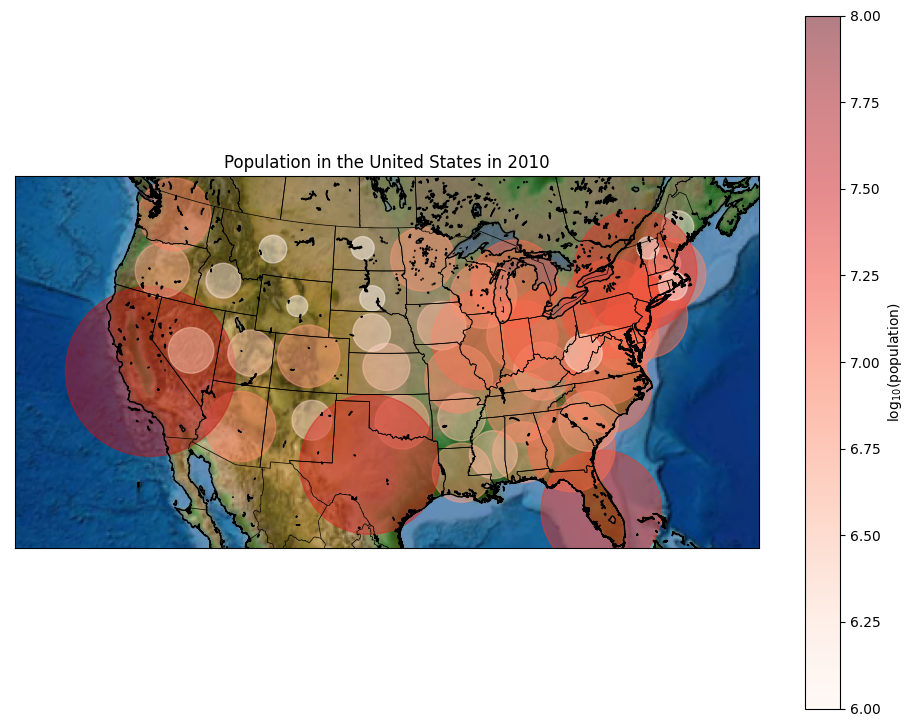

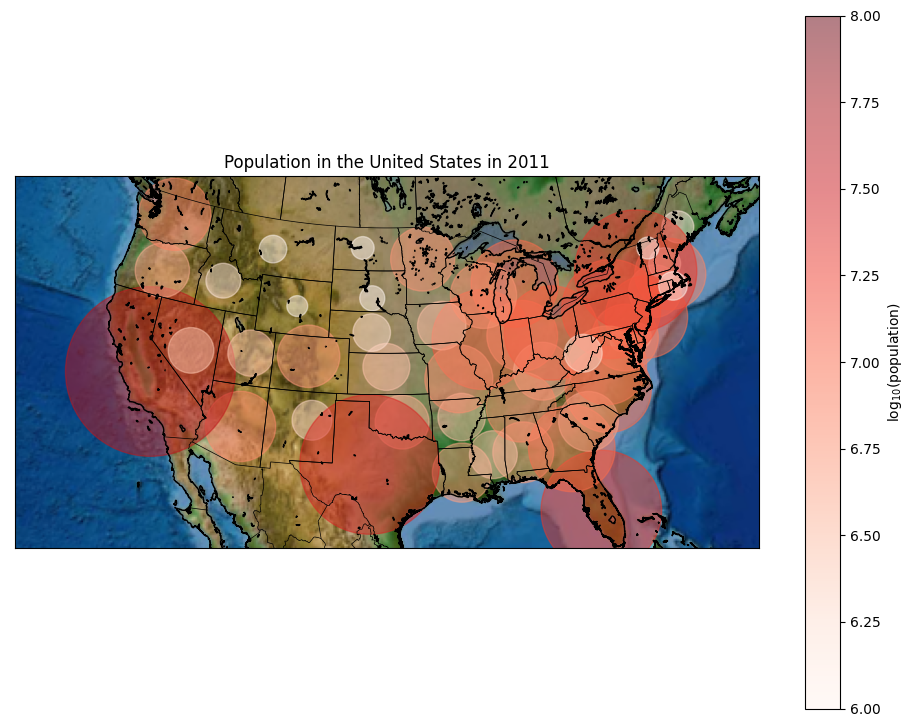

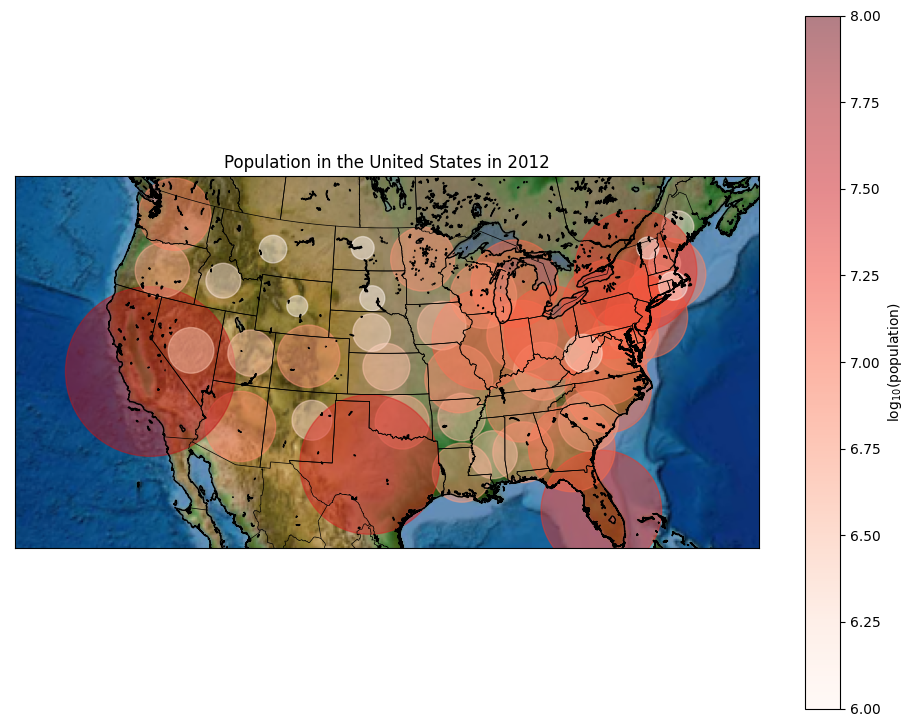

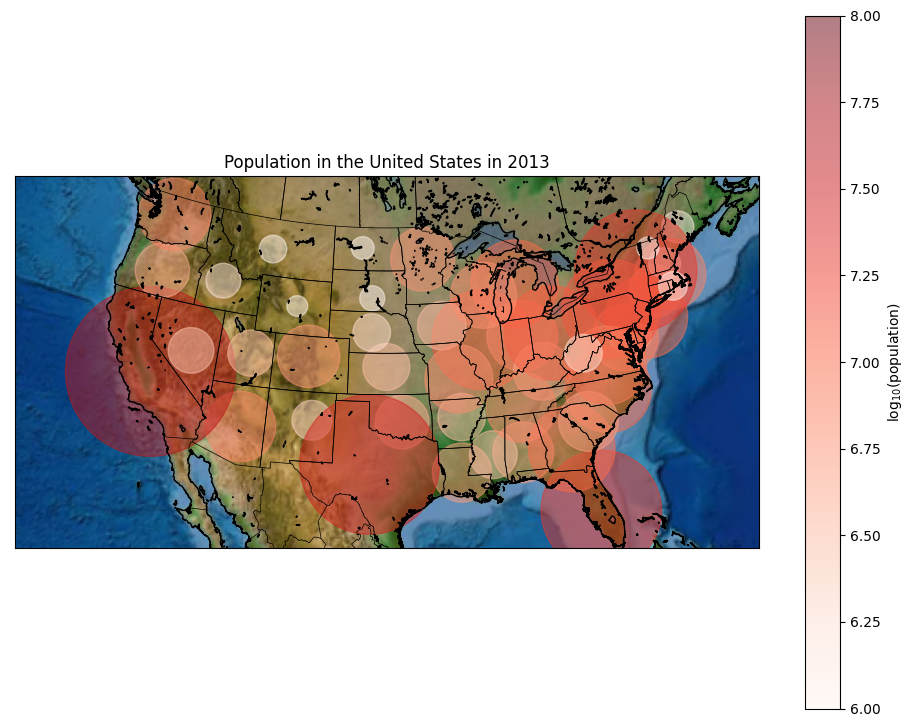

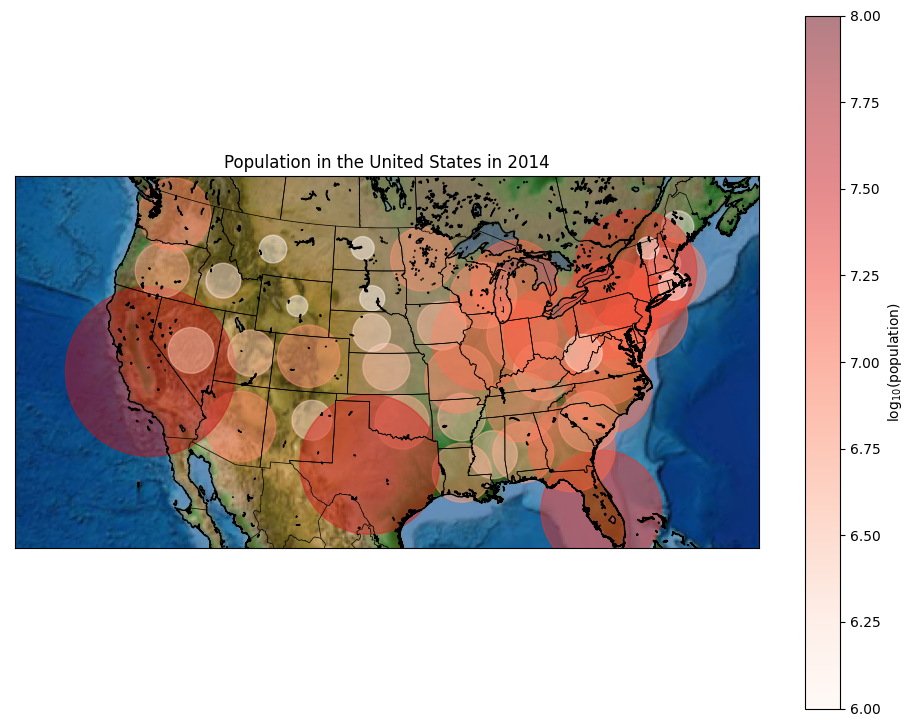

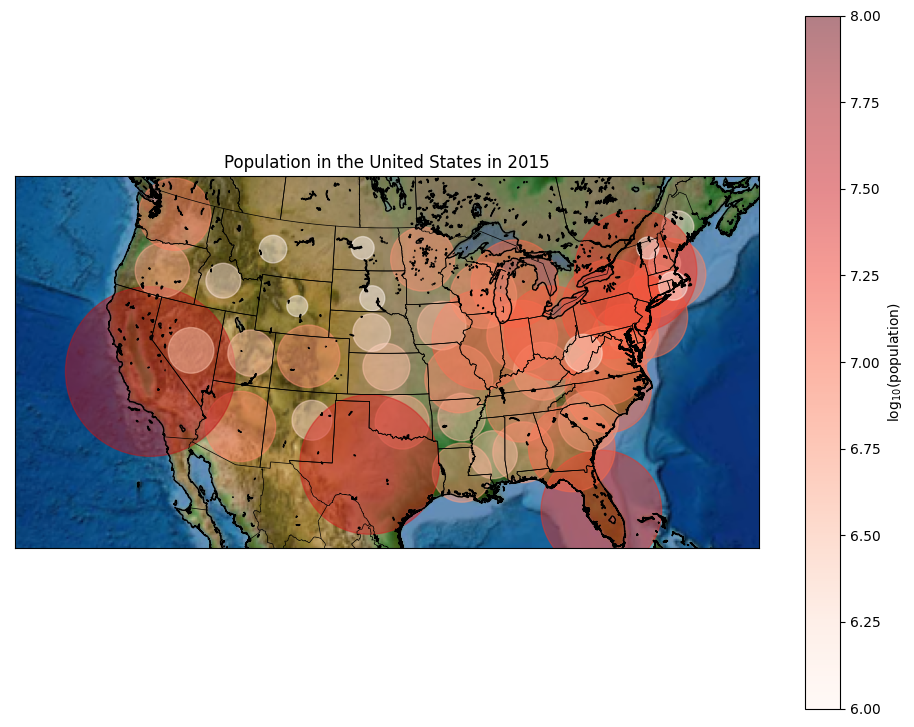

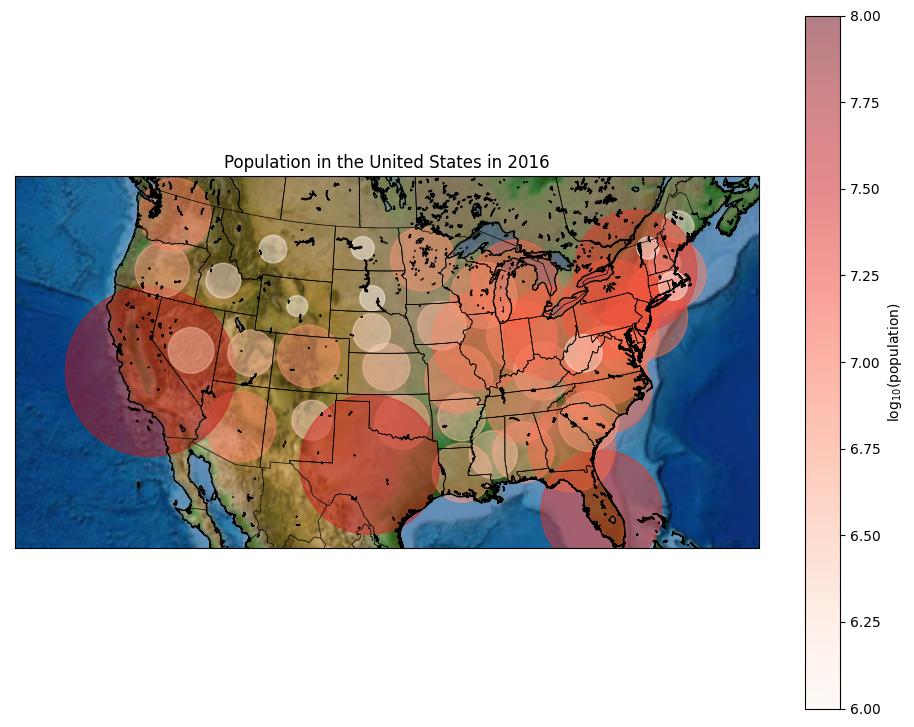

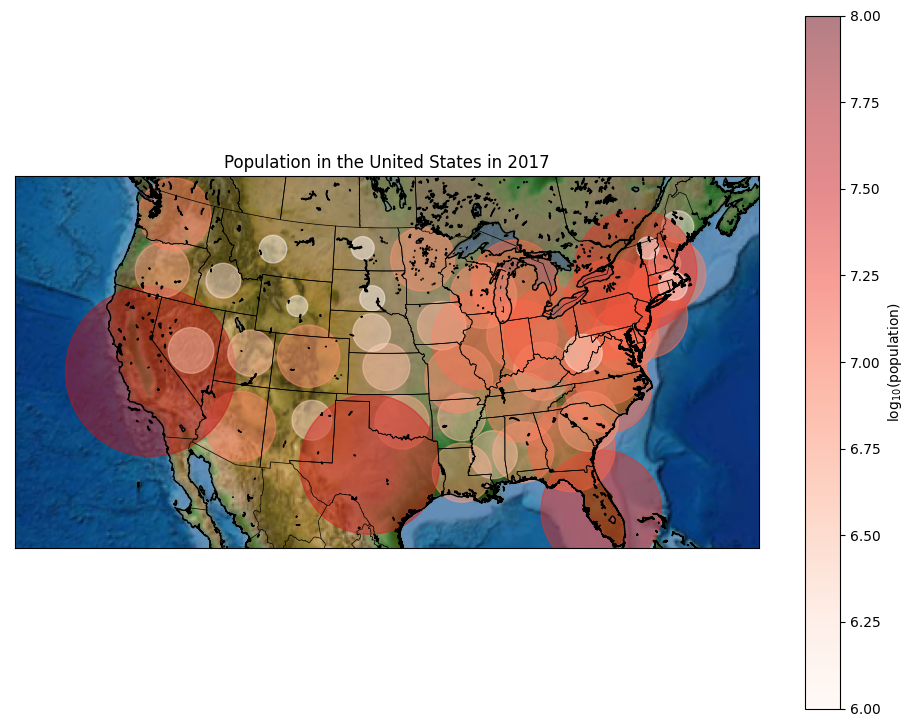

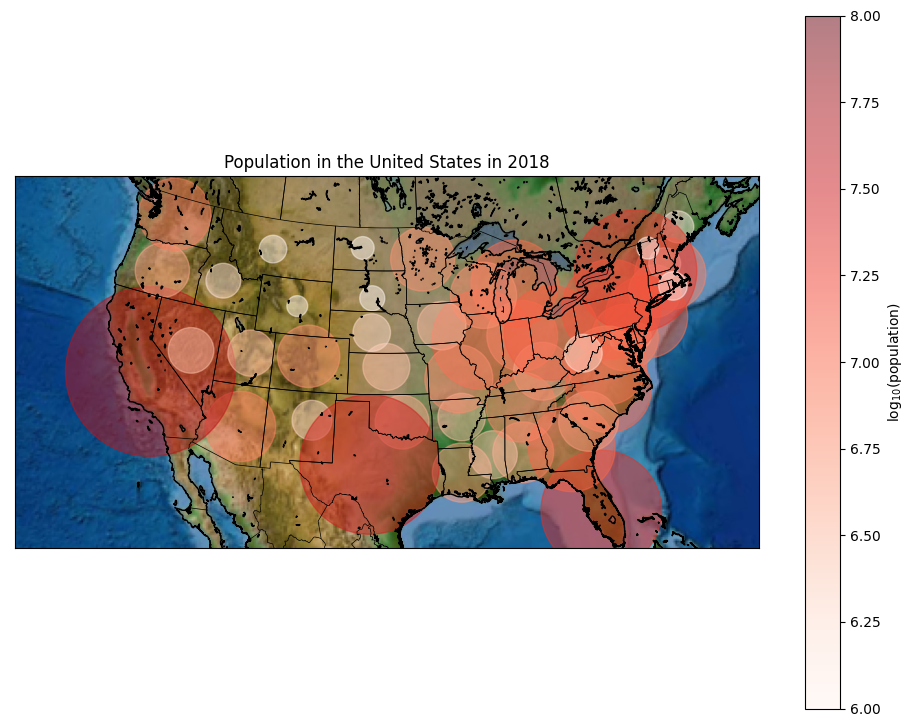

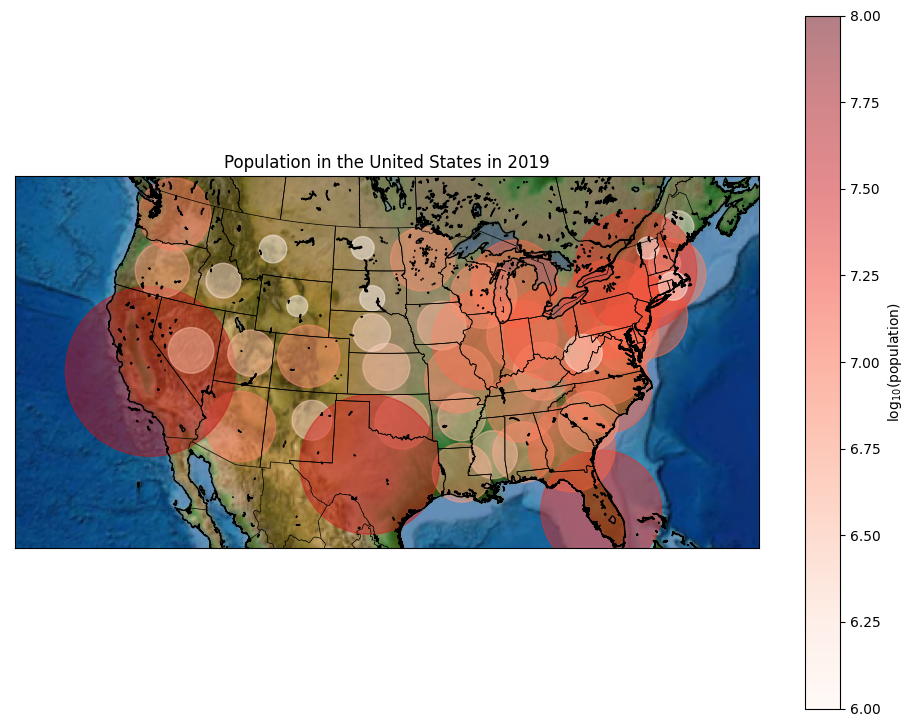

In [11]:
# Use the basemap and matplotlib to create the images.

for year in cleanMergedDf.columns[7:]:
    plt.figure(figsize=(CANVAS_WIDTH, CANVAS_HEIGHT))
    m = Basemap(projection='gnom',  resolution='h',
                lat_0=LAT_0, lon_0=LON_0,
                width=MAP_WIDTH_IN_METERS, height=MAP_HEIGHT_IN_METERS)
    m.bluemarble(scale=BLUEMARBLE_SCALE);
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.etopo(scale = ETOPO_SCALE, alpha = ETOPO_ALPHA)
    m.scatter(lon, lat, latlon=True,
             c=np.log10(cleanMergedDf[str(year)].astype(int)), s=population2010*POINTS_SCALE_FACTOR,
             cmap='Reds', alpha=SCATTER_ALPHA)
    plt.colorbar(label=r'$\log_{10}({\rm population})$')
    plt.clim(LOWER_COLOR_LIMIT,UPPER_COLOR_LIMIT)
    plt.title('Population in the United States in ' + str(year))
    # plt.savefig('C:\\Users\\Usuario\\Desktop\\PythonProjects\\JupyterNotebook\\Basemap\\USpopulation\\USPopulationPerState' + str(year) + '.png')

